importing Jupyter notebook from DaraPre.ipynb
0    282686
1     24825
Name: TARGET, dtype: int64
The no of duplicates in the data: 0
3 columns were label encoded.
Training Features shape:  (307511, 182)
Testing Features shape:  (48744, 239)
Training Features shape:  (307511, 179)
Testing Features shape:  (48744, 178)
The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment
There are 9274 anomalies in the test data out of 48744 entries
Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M             

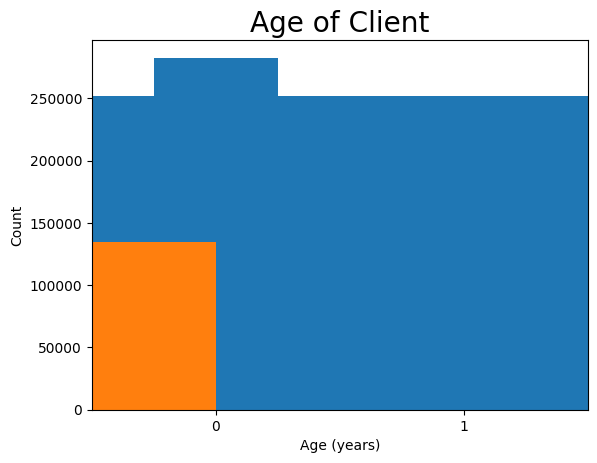

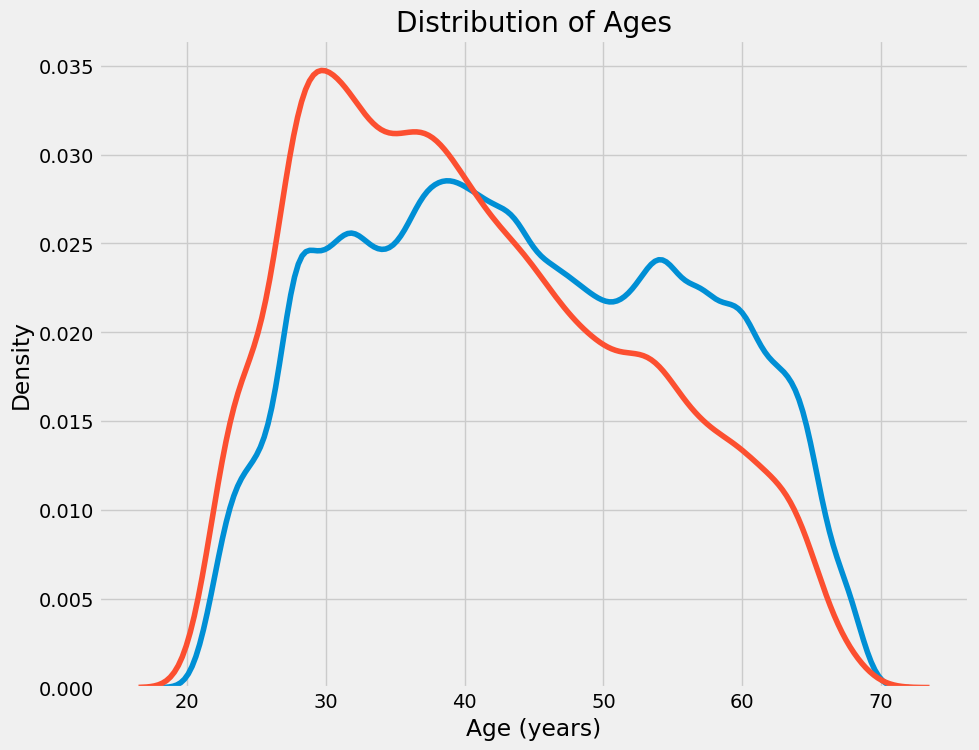

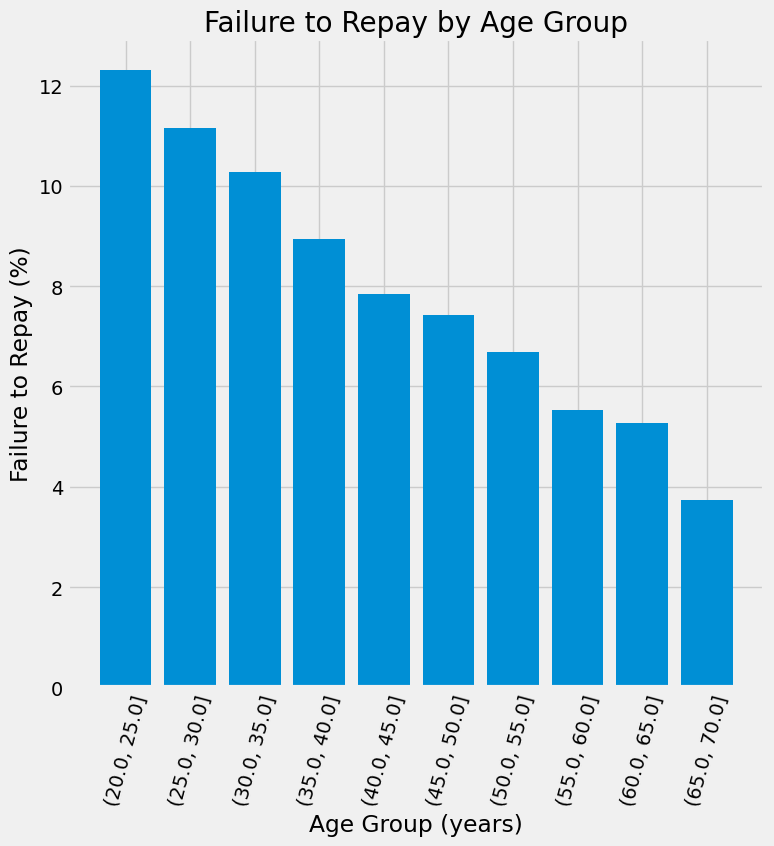

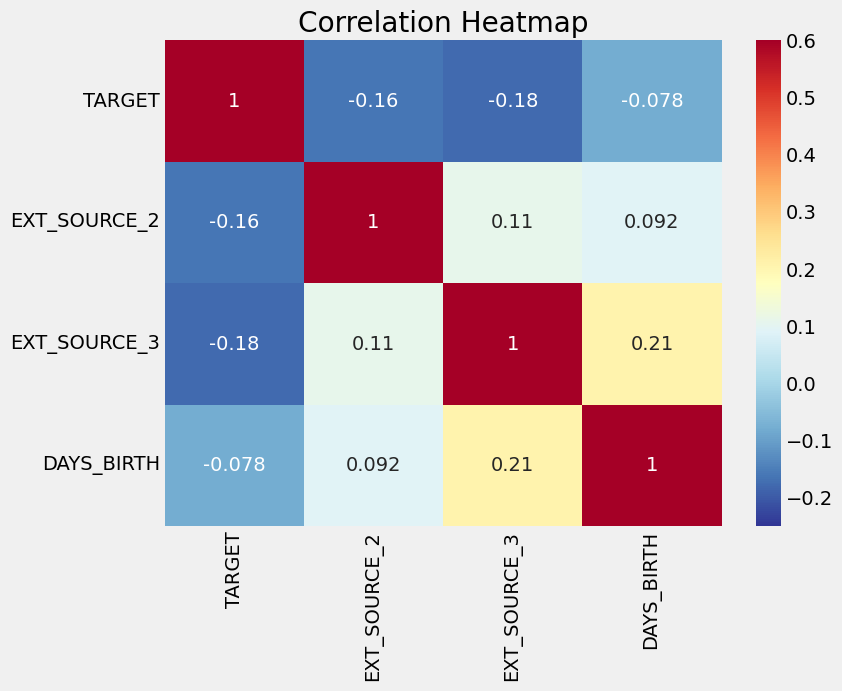

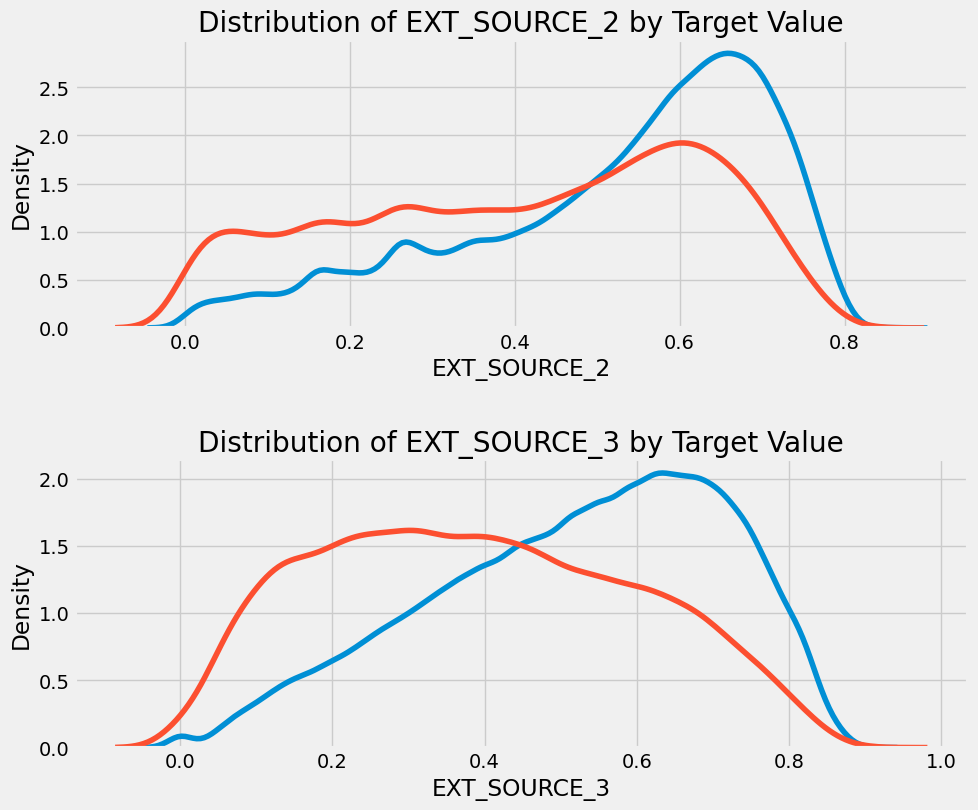

In [3]:
import Ipynb_importer
import DaraPre

importing Jupyter notebook from FeatureEngineering.ipynb
Polynomial Features shape:  (307511, 20)
EXT_SOURCE_2 EXT_SOURCE_3              -0.194235
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH   -0.181417
EXT_SOURCE_2^2 EXT_SOURCE_3            -0.176589
EXT_SOURCE_2 EXT_SOURCE_3^2            -0.171729
EXT_SOURCE_2                           -0.160303
EXT_SOURCE_3                           -0.157397
EXT_SOURCE_2 DAYS_BIRTH                -0.156879
EXT_SOURCE_3 DAYS_BIRTH                -0.150936
EXT_SOURCE_2^2                         -0.149502
EXT_SOURCE_2^2 DAYS_BIRTH              -0.149298
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64
Training data with polynomial features shape:  (307511, 199)
Testing data with polynomial features shape:   (48744, 199)


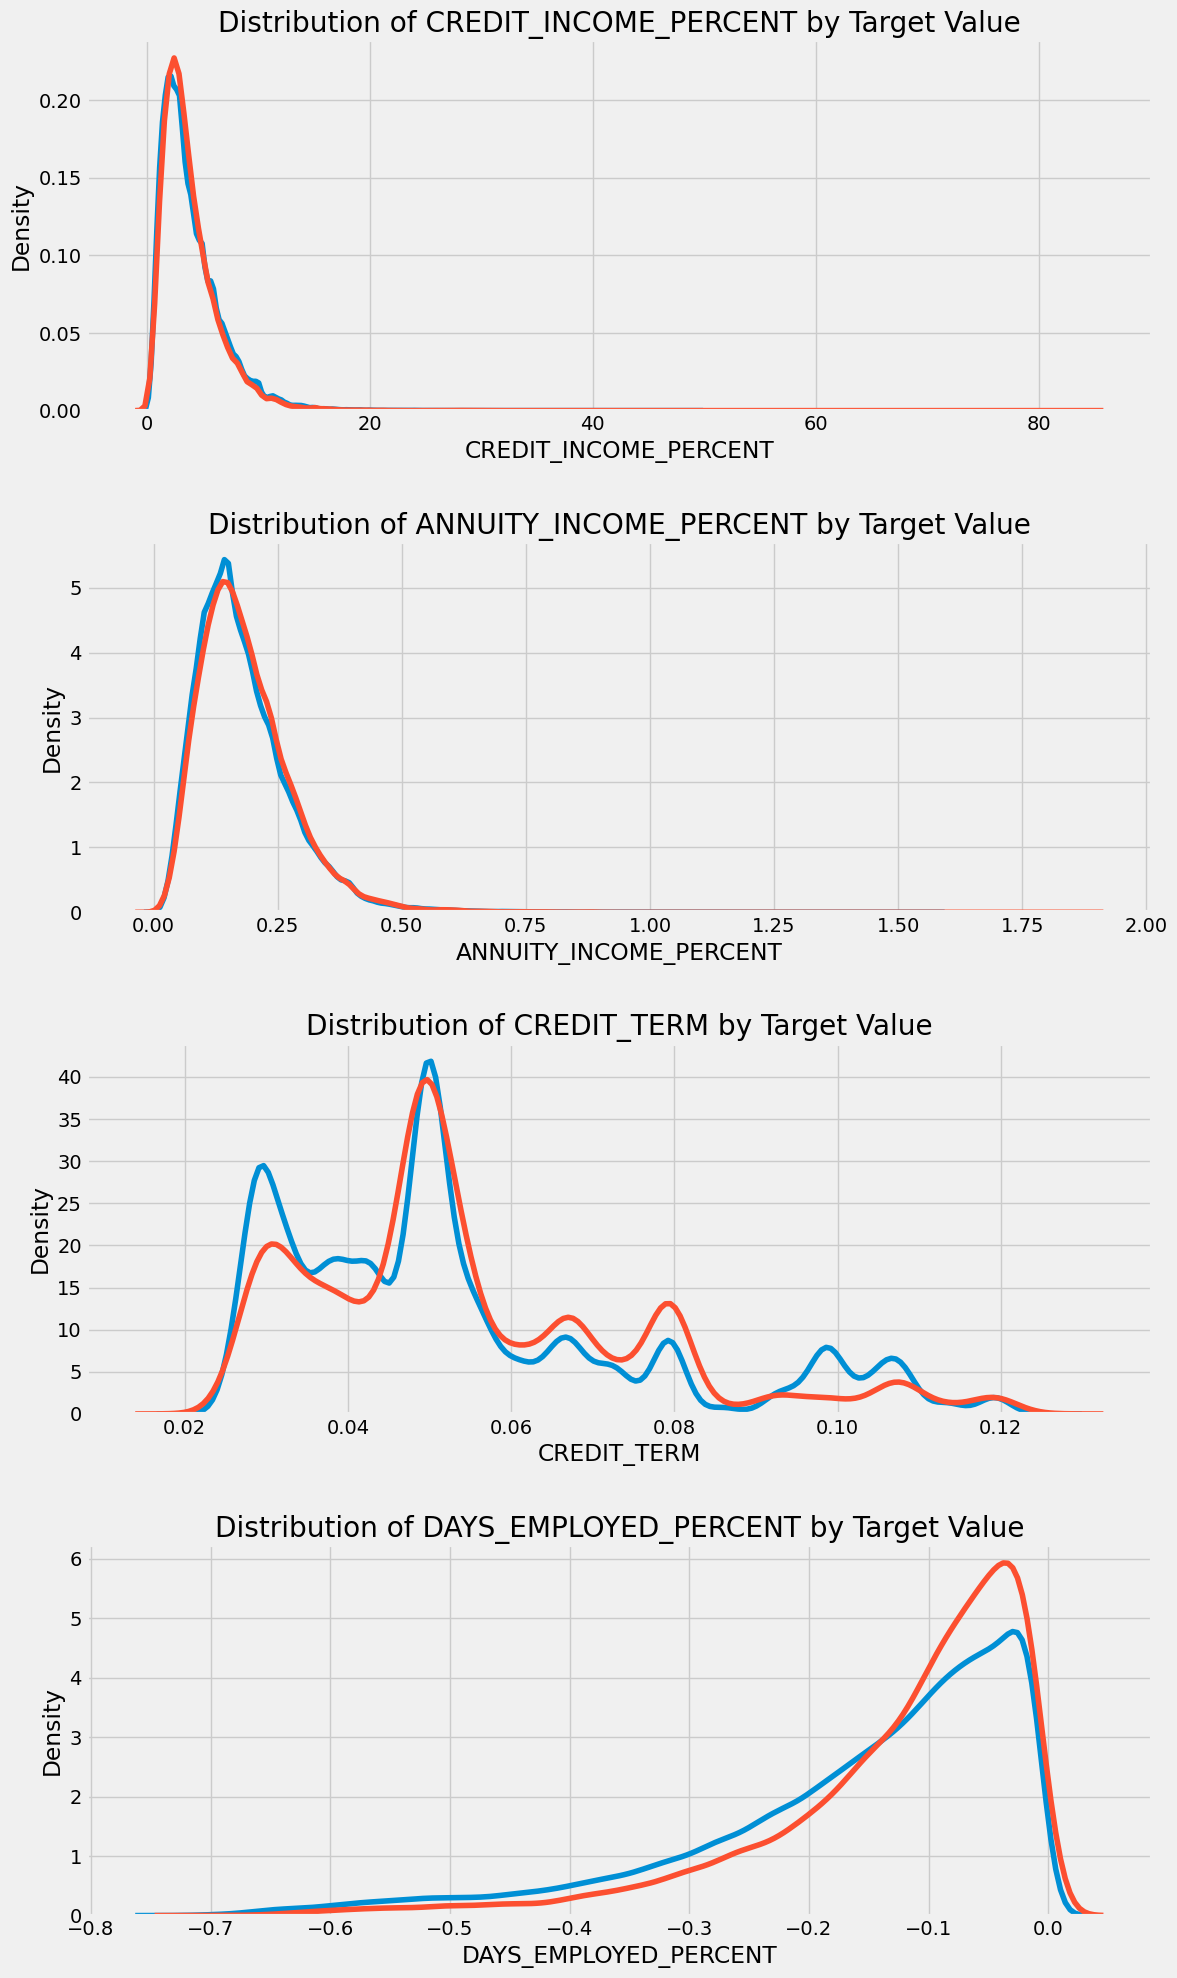

In [4]:
import sys
sys.path.append(r'/Users/douzi/Desktop/application_of_data/step1-data/DaraPre.ipynb')
sys.path.append(r'/Users/douzi/Desktop/application_of_data/step1-data/FeatureEngineering.ipynb')
from DaraPre import *
from FeatureEngineering import *

Logistic Regression Implementation

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
# imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 179)
Testing data shape:  (48744, 179)


In [6]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

In [9]:
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [10]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.082264
1,100005,0.131872
2,100013,0.077111
3,100028,0.091609
4,100038,0.125964


In [12]:
submit.to_csv('log_reg_baseline.csv', index = False)

Improved Model: Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [8]:
# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   35.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished


In [13]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index = False)